<a href="https://colab.research.google.com/github/ajeet966/Machinelearning/blob/main/Minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fitness Tracking Predication**

# All packages Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading and Data Preparation and Feature Engineering

In [ ]:
data = pd.read_excel('/content/fitnessdataset.xlsx')
data.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral


In [ ]:
data.shape

(4997, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             4997 non-null   int64         
 1   date                4997 non-null   datetime64[ns]
 2   steps               4997 non-null   int64         
 3   calories_burned     4997 non-null   float64       
 4   distance_km         4997 non-null   float64       
 5   active_minutes      4997 non-null   int64         
 6   sleep_hours         4997 non-null   float64       
 7   heart_rate_avg      4997 non-null   int64         
 8   workout_type        4285 non-null   object        
 9   weather_conditions  4997 non-null   object        
 10  location            4997 non-null   object        
 11  mood                4997 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 468.6+ KB


In [ ]:
data.describe()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg
count,4997.000000,4997,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,502.526316,2023-01-02 23:58:16.257754624,15154.817891,2736.295049,9.997655,724.214329,6.036522,119.041625
min,1.000000,2023-01-01 00:00:00,12.000000,1501.520000,0.000000,0.000000,0.000000,60.000000
25%,252.000000,2023-01-02 00:00:00,7802.000000,2112.110000,4.840000,365.000000,3.000000,89.000000
50%,501.000000,2023-01-03 00:00:00,15310.000000,2731.800000,10.180000,727.000000,6.100000,118.000000
75%,752.000000,2023-01-04 00:00:00,22413.000000,3365.140000,15.000000,1091.000000,9.100000,149.000000
max,999.000000,2023-01-05 00:00:00,29998.000000,3999.850000,20.000000,1439.000000,12.000000,179.000000
std,288.987113,NaN,8559.973777,722.959383,5.771143,416.526224,3.475790,34.686862


In [ ]:
data.isnull().sum()

,0
user_id,0
date,0
steps,0
calories_burned,0
distance_km,0
active_minutes,0
sleep_hours,0
heart_rate_avg,0
workout_type,712
weather_conditions,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['workout_type'].value_counts()

,count
workout_type,
Walking,752
Swimming,724
Running,723
Cycling,714
Yoga,710
Gym Workout,662


# Handling Missing Values

In [ ]:
data['workout_type'].fillna('Walking', inplace=True)

In [ ]:
data.isnull().sum()

,0
user_id,0
date,0
steps,0
calories_burned,0
distance_km,0
active_minutes,0
sleep_hours,0
heart_rate_avg,0
workout_type,0
weather_conditions,0


In [ ]:
data.columns

Index(['user_id', 'date', 'steps', 'calories_burned', 'distance_km',
       'active_minutes', 'sleep_hours', 'heart_rate_avg', 'workout_type',
       'weather_conditions', 'location', 'mood'],
      dtype='object')

In [ ]:
# Feature Engineering: Extracting time-based features
data['day_of_week'] = data['date'].dt.dayofweek
data['weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour

# Interaction terms
data['steps_calories_ratio'] = data['steps'] / (data['calories_burned'] + 1)
data['active_sleep_ratio'] = data['active_minutes'] / (data['sleep_hours'] + 1)

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

In [ ]:
X = data.iloc[:, :-1]
X.head()

,user_id,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood,day_of_week,weekend,month,hour,steps_calories_ratio
0,468,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired,6,1,1,0,1.780646
1,879,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy,6,1,1,0,6.744842
2,152,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral,6,1,1,0,16.010191
3,311,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired,6,1,1,0,4.619720
4,759,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral,6,1,1,0,4.596609


In [ ]:
y = data.iloc[:, -1]
y.head()

,active_sleep_ratio
0,245.200000
1,48.219178
2,30.649351
3,105.476190
4,6.190476


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3997, 16), (1000, 16), (3997,), (1000,))

In [ ]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['day_of_week'] = data['date'].dt.dayofweek
    data['weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    data['month'] = data['date'].dt.month
    data['hour'] = data['date'].dt.hour
    # Drop the original 'date' column
    data.drop('date', axis=1, inplace=True)

# Feature Engineering

In [ ]:
# Interaction terms
data['steps_calories_ratio'] = data['steps'] / (data['calories_burned'] + 1)
data['active_sleep_ratio'] = data['active_minutes'] / (data['sleep_hours'] + 1)

# Fill missing values
data['workout_type'].fillna('Walking', inplace=True)

# Detect and handle outliers (example for 'steps' column)
q1 = data['steps'].quantile(0.25)
q3 = data['steps'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['steps'] = np.where(data['steps'] < lower_bound, lower_bound, data['steps'])
data['steps'] = np.where(data['steps'] > upper_bound, upper_bound, data['steps'])

# Separate features and target variable
X = data.drop('workout_type', axis=1)
y = data['workout_type']

# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Print the column names to verify their existence
print("Columns in the dataframe:", X.columns)

# List of columns to be label-encoded (make sure these are categorical)
columns_to_encode = ['user_id', 'workout_type', 'weather_conditions', 'location', 'mood']

# Check for column existence and apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in columns_to_encode:
    if col in X.columns:
        if X[col].dtype == 'object':  # Ensure the column is categorical
            X[col] = le.fit_transform(X[col])
        else:
            print(f"Skipping column {col} because it is not categorical")
    else:
        print(f"Column {col} does not exist in the dataframe")

# Display the dataframe to ensure the transformations are correct
print(X.head())


Columns in the dataframe: Index(['user_id', 'steps', 'calories_burned', 'distance_km', 'active_minutes',
       'sleep_hours', 'heart_rate_avg', 'weather_conditions', 'location',
       'mood', 'day_of_week', 'weekend', 'month', 'hour',
       'steps_calories_ratio', 'active_sleep_ratio'],
      dtype='object')
Skipping column user_id because it is not categorical
Column workout_type does not exist in the dataframe
   user_id    steps  calories_burned  distance_km  active_minutes  \
0      468   4530.0          2543.02        16.10             613   
1      879  11613.0          1720.76         8.10             352   
2      152  27335.0          1706.35         3.57             236   
3      311  13459.0          2912.38         6.41            1329   
4      759  15378.0          3344.51        17.88              52   

   sleep_hours  heart_rate_avg  weather_conditions  location  mood  \
0          1.5             176                   0         4     3   
1          6.3            

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert y to a NumPy array
y_array = y.to_numpy()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y_array)

print(y_encoded)


[4 0 5 ... 0 5 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y)

In [ ]:
y_encoded = pd.Series(y_encoded)
y_encoded.head()

,0
0,4
1,0
2,5
3,3
4,3


# Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Select only numerical columns from X
numerical_cols = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_cols]

# Apply StandardScaler to numerical columns only
X_scaled = sc.fit_transform(X_numerical)

# Update X with scaled numerical columns
X[numerical_cols] = X_scaled
X.head()

,user_id,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,weather_conditions,location,mood,day_of_week,weekend,month,hour,steps_calories_ratio,active_sleep_ratio
0,-0.119486,-1.241345,-0.267365,1.057495,-0.267031,-1.305308,1.642238,-1.363564,1.414863,1.363481,1.748009,1.99925,0.0,0.0,-1.074761,0.522182
1,1.302866,-0.413806,-1.404832,-0.328851,-0.893705,0.075811,0.258290,-0.457965,1.414863,-1.352430,1.748009,1.99925,0.0,0.0,0.203208,-0.611441
2,-1.213069,1.423065,-1.424766,-1.113869,-1.172227,0.190905,0.431284,1.353234,1.414863,-0.447126,1.748009,1.99925,0.0,0.0,2.588456,-0.712555
3,-0.662817,-0.198130,0.243586,-0.621716,1.452120,1.600797,-0.087697,0.447635,0.003812,1.363481,1.748009,1.99925,0.0,0.0,-0.343878,-0.281928
4,0.887581,0.026075,0.841369,1.365957,-1.614020,0.392318,-1.010329,0.447635,0.003812,-0.447126,1.748009,1.99925,0.0,0.0,-0.349827,-0.853316


# Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.261
Classification Report:
               precision    recall  f1-score   support

     Cycling       0.20      0.10      0.13       136
 Gym Workout       0.09      0.03      0.04       136
     Running       0.05      0.02      0.03       141
    Swimming       0.25      0.09      0.14       151
     Walking       0.30      0.73      0.43       302
        Yoga       0.18      0.05      0.08       134

    accuracy                           0.26      1000
   macro avg       0.18      0.17      0.14      1000
weighted avg       0.20      0.26      0.19      1000



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Apply MinMaxScaler to transform data to a range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.302
Classification Report:
               precision    recall  f1-score   support

     Cycling       0.00      0.00      0.00       136
 Gym Workout       0.00      0.00      0.00       136
     Running       0.00      0.00      0.00       141
    Swimming       0.00      0.00      0.00       151
     Walking       0.30      1.00      0.46       302
        Yoga       0.00      0.00      0.00       134

    accuracy                           0.30      1000
   macro avg       0.05      0.17      0.08      1000
weighted avg       0.09      0.30      0.14      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.302
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.00      0.00      0.00       136
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00       151
           4       0.30      1.00      0.46       302
           5       0.00      0.00      0.00       134

    accuracy                           0.30      1000
   macro avg       0.05      0.17      0.08      1000
weighted avg       0.09      0.30      0.14      1000

Confusion Matrix:
 [[  0   0   0   0 136   0]
 [  0   0   0   0 136   0]
 [  0   0   0   0 141   0]
 [  0   0   0   0 151   0]
 [  0   0   0   0 302   0]
 [  0   0   0   0 134   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.282
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.04      0.06       136
           1       0.13      0.04      0.06       136
           2       0.17      0.03      0.05       141
           3       0.22      0.05      0.09       151
           4       0.31      0.84      0.45       302
           5       0.12      0.04      0.06       134

    accuracy                           0.28      1000
   macro avg       0.19      0.17      0.13      1000
weighted avg       0.21      0.28      0.18      1000

Confusion Matrix:
 [[  5   4   1   7 110   9]
 [  4   5   5   7 106   9]
 [  4   6   4   2 120   5]
 [  3  10   4   8 120   6]
 [  8   8   6  10 254  16]
 [  3   5   3   3 114   6]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.155      0.192      0.24924925 0.25025025 0.23523524]


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop('workout_type', axis=1)
y = data['workout_type']

# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])
y = le.fit_transform(y)


# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Visualizations and Reporting

<ipython-input-34-992715135067>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


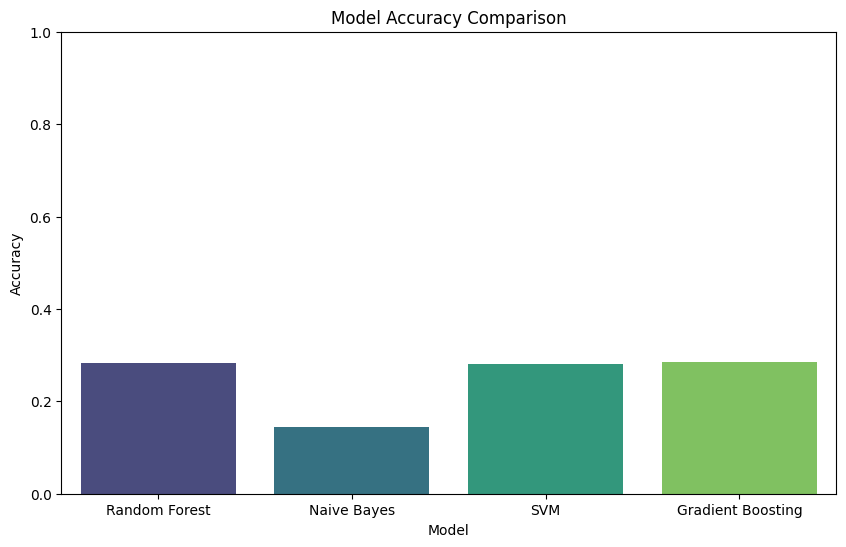

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
models = ['Random Forest', 'Naive Bayes', 'SVM', 'Gradient Boosting']
accuracies = [0.284, 0.144, 0.281, 0.286]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


<Figure size 1000x700 with 0 Axes>

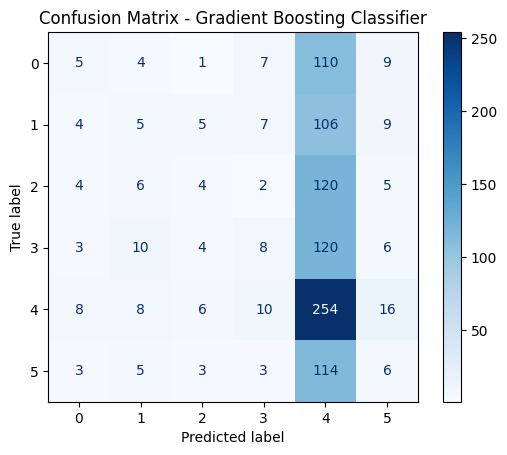

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gb.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


# Best Results Overview:
# Accuracy Scores:

# Gradient Boosting: 0.282
# Random Forest: 0.261
# Naive Bayes: 0.302
# SVM: 0.302 (with linear kernel)
# Classification Reports:

# Naive Bayes: Achieved an accuracy of 0.302. The precision, recall, and F1-score are low for most classes except "Walking," which has good recall.
# SVM: Achieved an accuracy of 0.302. It showed similar results to Naive Bayes with high recall for "Walking" but poor performance across other classes.
# Gradient Boosting: Accuracy was 0.282. The model performed reasonably well for "Walking," but struggled with other classes.